# Q4

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Section 1

In [2]:
spineXray = cv.imread("./spineXray.tif", cv.IMREAD_GRAYSCALE)
chest = cv.imread("./chest.tif", cv.IMREAD_ANYDEPTH)

In [3]:
print(f"""
Name : spineXray
shape: {spineXray.shape}
dtype: {spineXray.dtype}
""")


Name : spineXray
shape: (706, 320)
dtype: uint8



In [4]:
print(f"""
Name : chest
shape: {chest.shape}
dtype: {chest.dtype}
""")


Name : chest
shape: (493, 600)
dtype: uint16



## Section 2
#### description in report file

In [5]:
def performCLAHE(img):
    clahe = cv.createCLAHE()
    return clahe.apply(img)

## Section 3

In [6]:
def transform(img, bit_depth):
    # calculate histogram
    hist = [0] * 2 ** bit_depth
    for i in img.flatten():
        hist[i] += 1
    hist = np.array(hist)
    cdf = [0] * 2 ** bit_depth
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = hist[i] + cdf[i-1]
    res = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res[i, j] = (2 ** bit_depth - 1) / img.size * cdf[img[i, j]]
    return res

## Section 4

In [7]:
def show(img):
    bit = int(str(img.dtype)[4:])
    clahe = performCLAHE(img)
    hist_equalized = transform(img, bit)
    bit_rate = int(2 ** bit / 64)

    fig = plt.figure(figsize=(12, 10))
    gs = fig.add_gridspec(3, 3)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 2 ** bit - 1)
    ax1.set_title('Original')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(clahe, cmap = 'gray', vmin = 0, vmax = 2 ** bit - 1)
    ax2.set_title('CLAHE')

    ax3 = fig.add_subplot(gs[0, 2])
    ax3.imshow(hist_equalized, cmap = 'gray', vmin = 0, vmax = 2 ** bit - 1)
    ax3.set_title('Hist Equalization')

    ax4 = fig.add_subplot(gs[1, 0])
    ax4.hist(img.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True)

    ax4 = fig.add_subplot(gs[1, 1])
    ax4.hist(clahe.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True)

    ax4 = fig.add_subplot(gs[1, 2])
    ax4.hist(hist_equalized.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True)

    ax5 = fig.add_subplot(gs[2, 0])
    ax5.hist(img.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True, cumulative = True)

    ax6 = fig.add_subplot(gs[2, 1])
    ax6.hist(clahe.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True, cumulative = True)

    ax7 = fig.add_subplot(gs[2, 2])
    ax7.hist(hist_equalized.ravel(), bins=[i for i in range(0, 2 ** bit, bit_rate)], density = True, cumulative = True)

    plt.show()

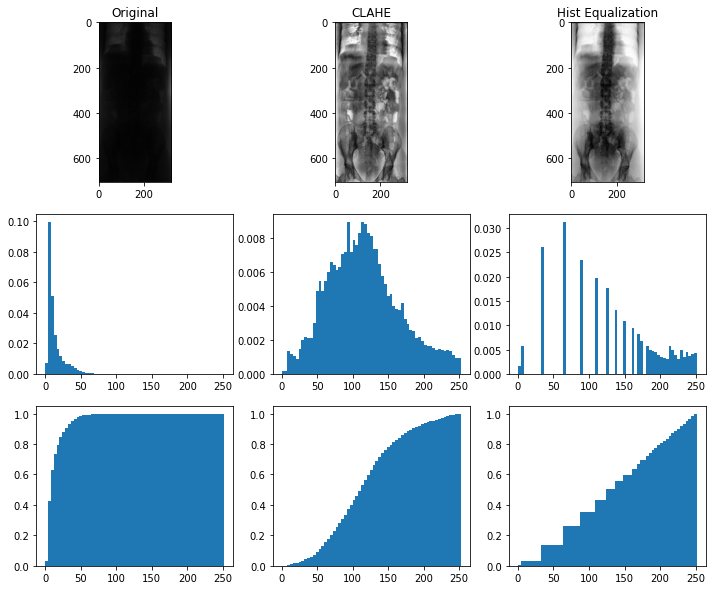

In [8]:
show(spineXray)


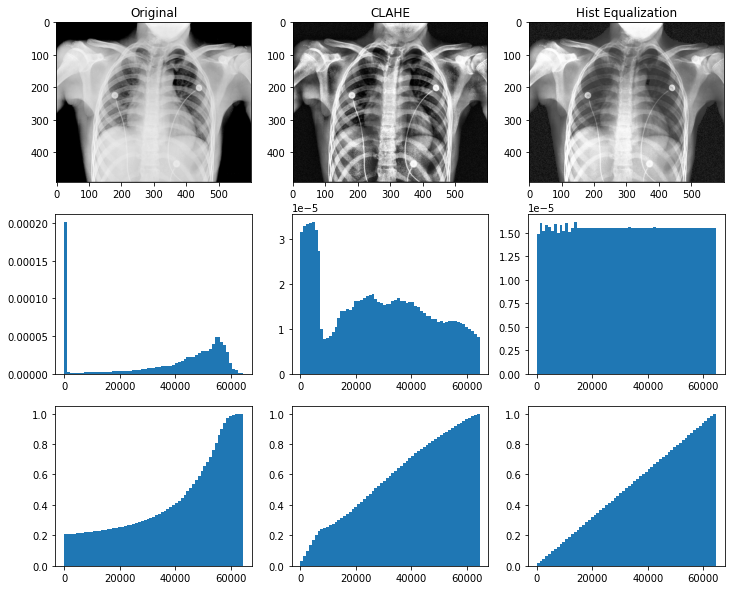

In [9]:
show(chest)

## Section 5
#### description in report file